In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the data and view it
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [3]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
#dropping columns
df.drop(['id','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 13.9+ MB


In [6]:
#Change the data type of Age feature
df['Age']=df['Age'].astype(int)

In [7]:
len(df[df.duplicated()])
duplicate_rows = df[df.duplicated()]
df=df.drop(duplicate_rows.index)

In [8]:
#Show inbalance dataset
df['Exited'].value_counts()

0    130002
1     34909
Name: Exited, dtype: int64

Text(0, 0.5, 'Frequency')

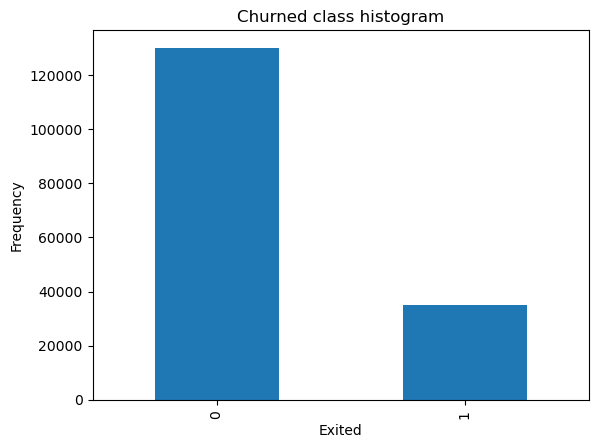

In [9]:
# Compare different class in the dataset
classes = df['Exited'].value_counts()
classes.plot(kind='bar')
plt.title("Churned class histogram")
plt.xlabel("Exited")
plt.ylabel("Frequency")

C:\Users\Prashansa\AppData\Local\Temp\ipykernel_11708\2799618587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'),annot=True,cmap="Blues")


<Axes: >

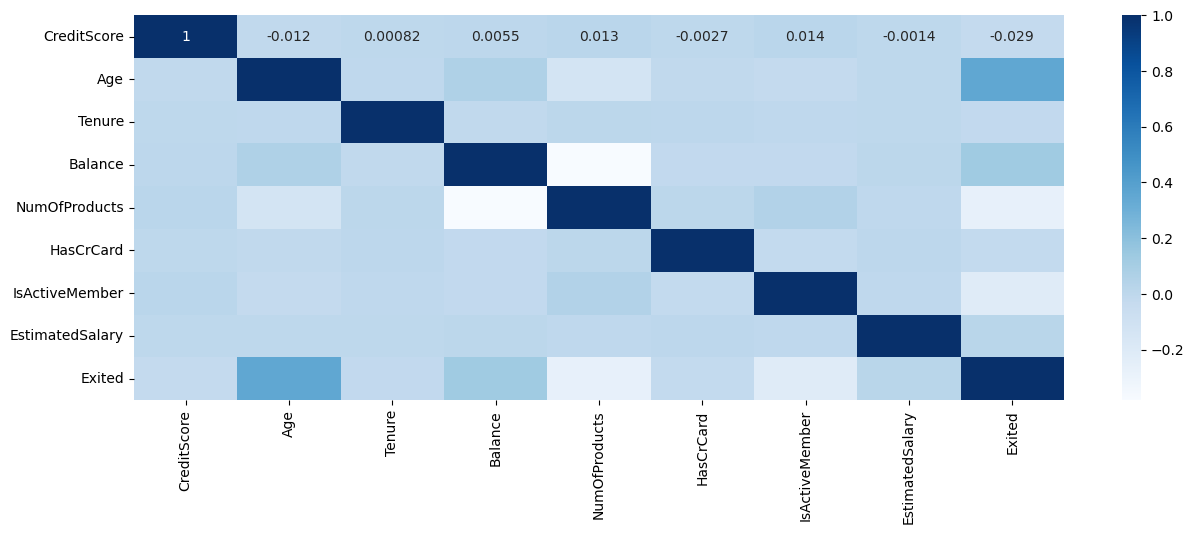

In [10]:
#Correlation
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(method = 'spearman'),annot=True,cmap="Blues")

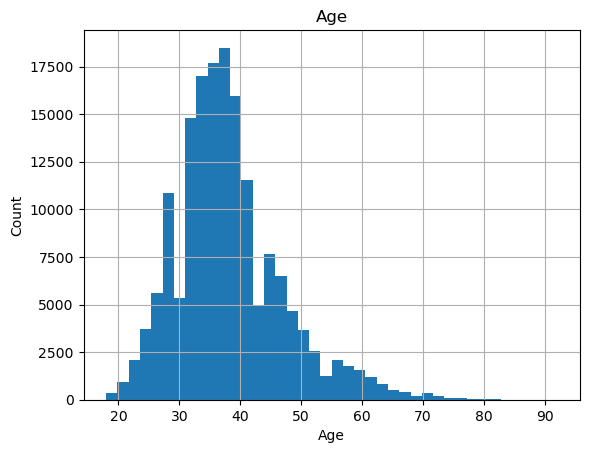

In [11]:
df['Age'].hist(bins=40)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

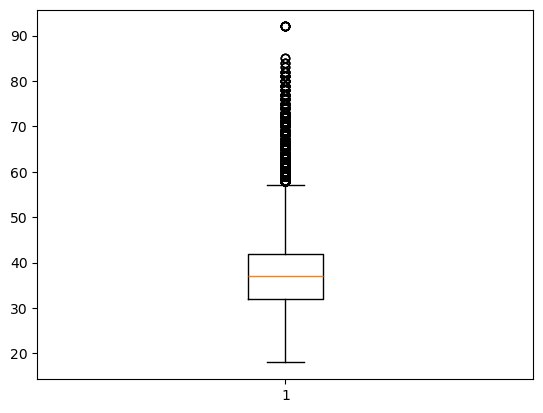

In [12]:
plt.boxplot(df['Age'])
plt.show()

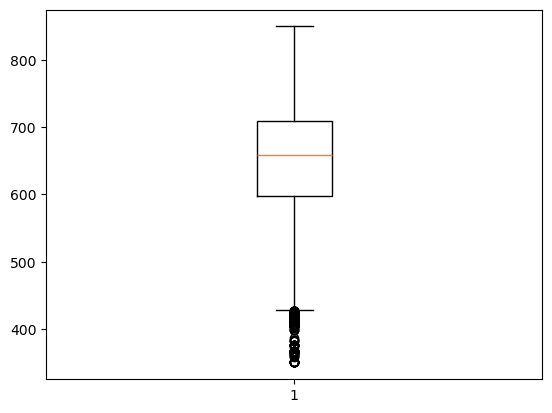

In [13]:
plt.boxplot(df['CreditScore'])
plt.show()

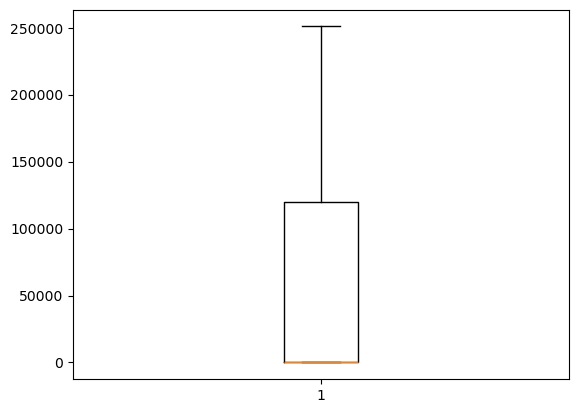

In [14]:
plt.boxplot(df['Balance'])
plt.show()

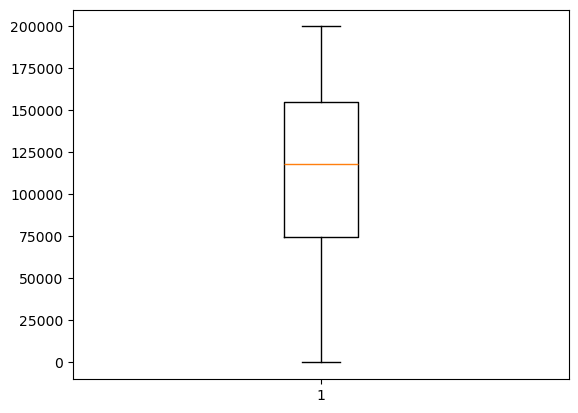

In [15]:
plt.boxplot(df['EstimatedSalary'])
plt.show()

<Axes: xlabel='CreditScore', ylabel='Density'>

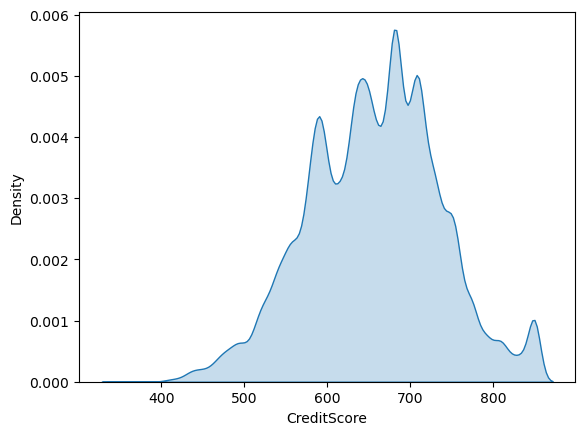

In [16]:
sns.kdeplot(data=df,x='CreditScore',fill=True)

<Axes: xlabel='Balance', ylabel='Density'>

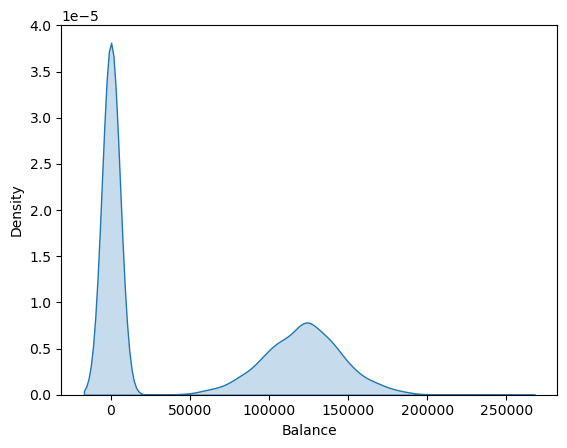

In [17]:
sns.kdeplot(data=df,x='Balance',fill=True)

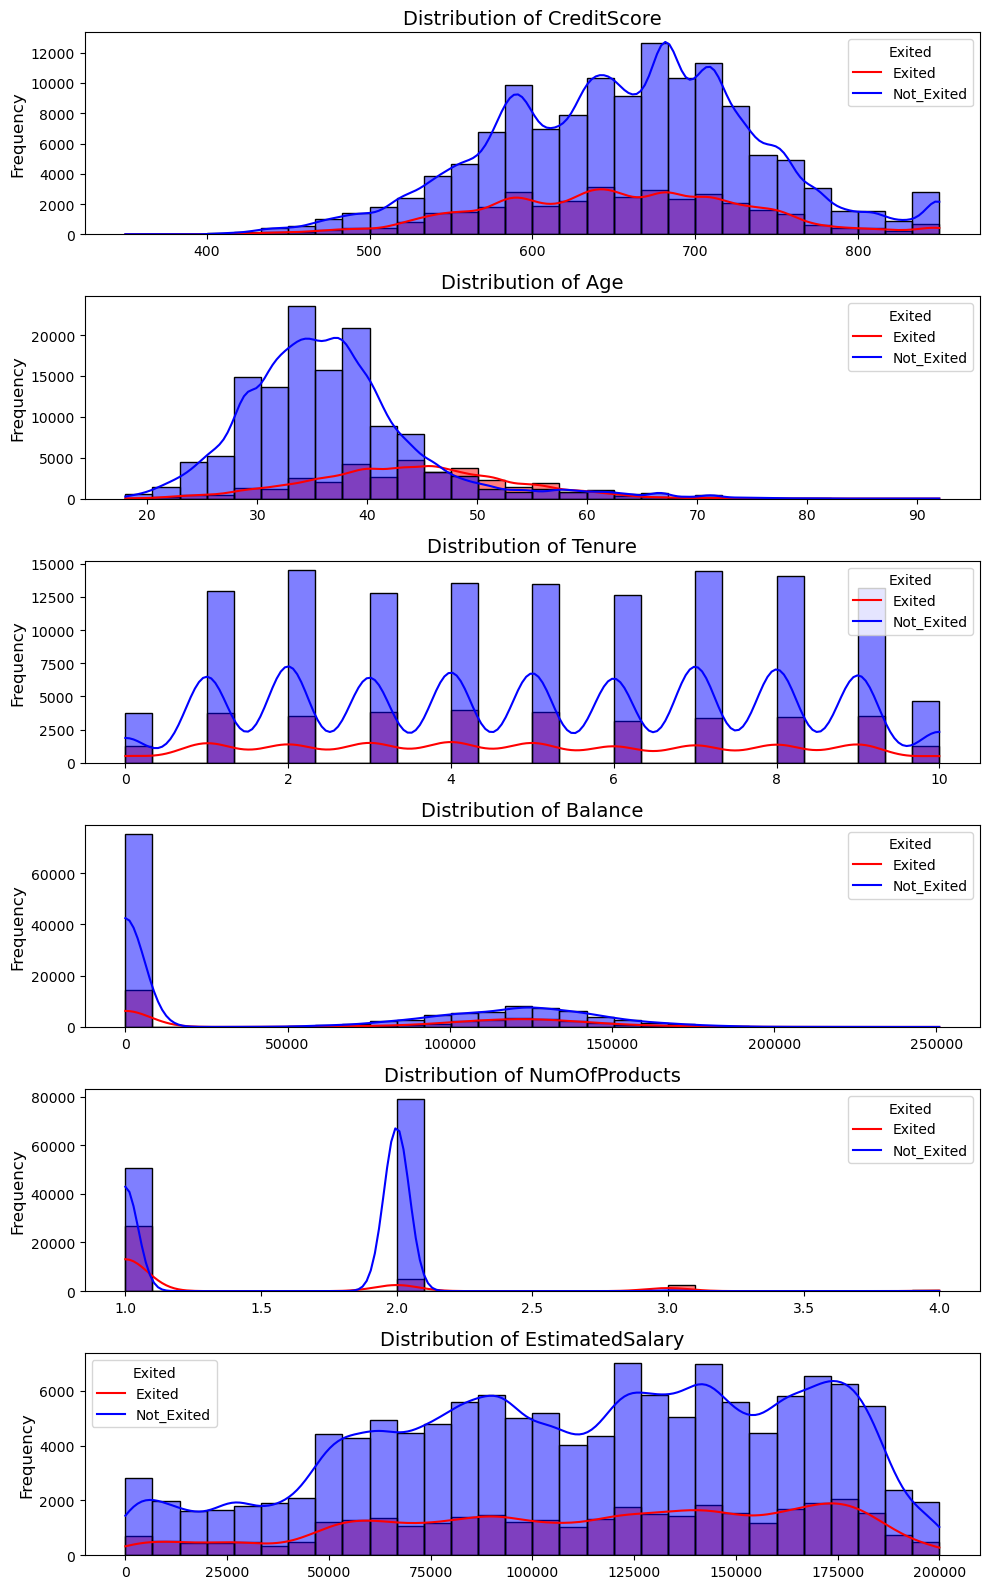

In [18]:
# List of numeric variables
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), ncols=1, figsize=(10, 16))

# Color palette for 'Exited' category (0: Not exited, 1: Exited)
colors = {0: 'blue', 1: 'red'}

# Plot histograms for each numeric variable
for i, var in enumerate(numeric_variables):
    sns.histplot(df, x=var, hue='Exited', ax=axes[i], kde=True, bins=30, palette=colors)
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend(title='Exited', labels=['Exited', 'Not_Exited'])

plt.tight_layout()
plt.show()

In [19]:
#No of customer churned in age between 48 to 68
df[(df['Age']>47) & (df['Age']<59)&(df['Exited']==1)].shape

(9635, 11)

In [20]:
#No of customer retained in age between 48 to 68
df[(df['Age']>47) & (df['Age']<59)&(df['Exited']==0)].shape

(6348, 11)

C:\Users\Prashansa\AppData\Local\Temp\ipykernel_11708\132275141.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_age.corr(method = 'spearman'),annot=True,cmap="Blues")


<Axes: >

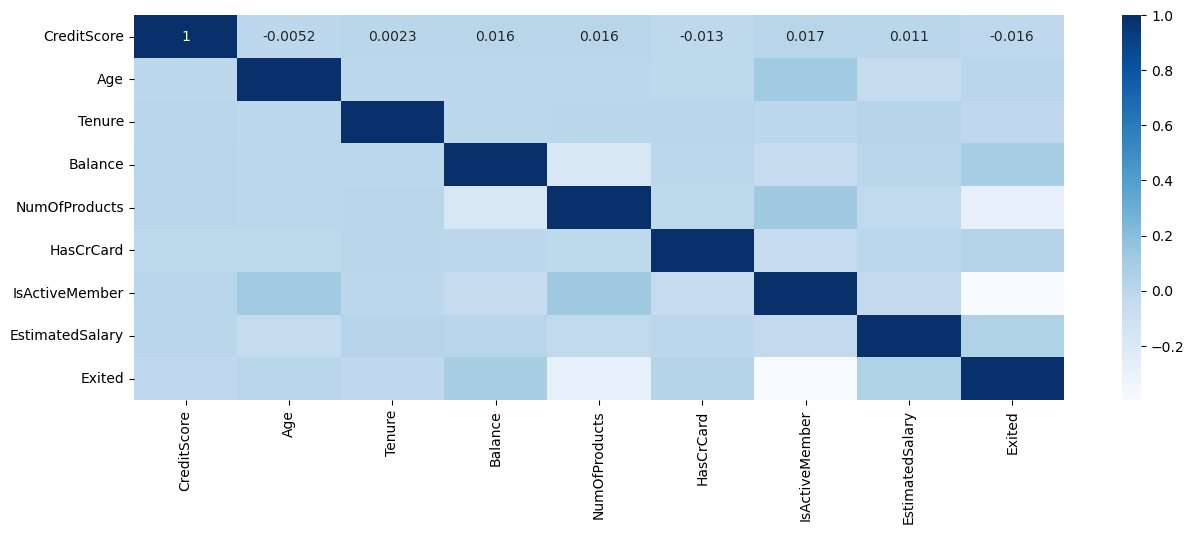

In [21]:
#Correlation among feature of people age between 48 to 58
#No of customer in age between 48 to 68
df_age=df[(df['Age']>47) & (df['Age']<59)]
fig = plt.figure(figsize=(15,5))
sns.heatmap(df_age.corr(method = 'spearman'),annot=True,cmap="Blues")

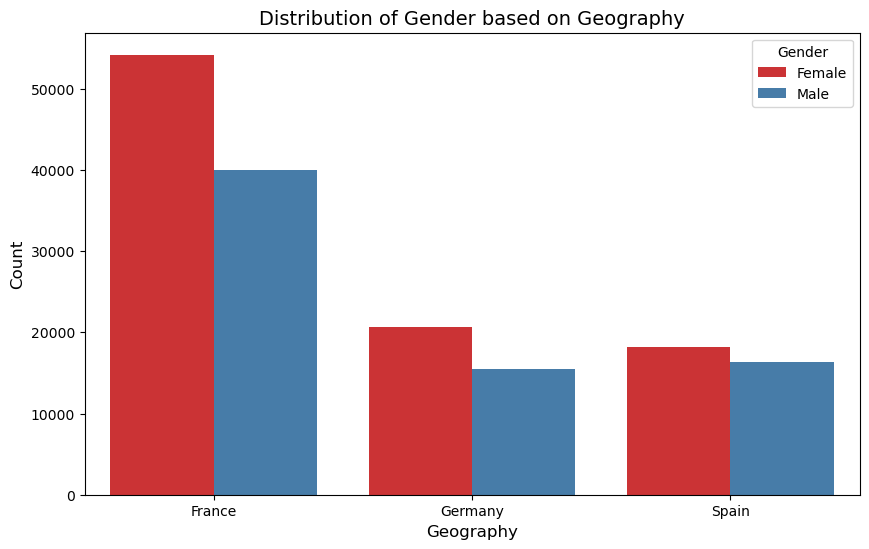

In [22]:
plt.figure(figsize=(10, 6))

# Countplot with stacked bars for Gender based on Geography
sns.countplot(data=df, x='Geography', hue='Gender', palette='Set1')

# Adding title and labels
plt.title('Distribution of Gender based on Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['France', 'Germany', 'Spain'])

# Adding legend
plt.legend(title='Gender', labels=['Female', 'Male'])

# Show plot
plt.show()

One Hot Encoding

In [23]:
#Performing one hot encoding using Pandas
df_encoded = pd.get_dummies(df, columns= ['Geography', 'Gender'])
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33,3,0.00,2,1,0,181449.97,0,1,0,0,0,1
1,627,33,1,0.00,2,1,1,49503.50,0,1,0,0,0,1
2,678,40,10,0.00,2,1,0,184866.69,0,1,0,0,0,1
3,581,34,2,148882.54,1,1,1,84560.88,0,1,0,0,0,1
4,716,33,5,0.00,2,1,1,15068.83,0,0,0,1,0,1
5,588,36,4,131778.58,1,1,0,136024.31,1,0,1,0,0,1
6,593,30,8,144772.69,1,1,0,29792.11,0,1,0,0,1,0
7,678,37,1,138476.41,1,1,0,106851.60,0,0,0,1,0,1
8,676,43,4,0.00,2,1,0,142917.13,0,1,0,0,0,1
9,583,40,4,81274.33,1,1,1,170843.07,0,0,1,0,0,1


In [24]:
from sklearn.preprocessing import StandardScaler

# Extract the features (excluding the target variable 'Exited')
X = df_encoded.drop(columns=['Exited'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the 'Exited' column back to the scaled DataFrame
data_scaled['Exited'] = df_encoded['Exited']

# Print the first few rows of the scaled dataset
print(data_scaled.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.143975 -0.578035 -0.720041 -0.883190       0.814337   0.571321   
1    -0.367944 -0.578035 -1.432741 -0.883190       0.814337   0.571321   
2     0.268833  0.211588  1.774410 -0.883190       0.814337   0.571321   
3    -0.942292 -0.465231 -1.076391  1.486833      -1.013252   0.571321   
4     0.743295 -0.578035 -0.007340 -0.883190       0.814337   0.571321   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0       -0.995396         1.369458          0.867129          -0.515163   
1        1.004625        -1.254249          0.867129          -0.515163   
2       -0.995396         1.437399          0.867129          -0.515163   
3        1.004625        -0.557146          0.867129          -0.515163   
4        1.004625        -1.938970         -1.153231          -0.515163   

   Geography_Spain  Gender_Female  Gender_Male  Exited  
0        -0.530255      -0.878526     0.878526 

In [25]:
print(data_scaled['Exited'].isnull().sum())

122


In [26]:
data_scaled.dropna(subset=['Exited'], inplace=True)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'data_scaled' contains your features (including the scaled columns)
# and 'y' contains your target variable ('Exited')
X = data_scaled.drop(columns=['Exited'])
y = data_scaled['Exited']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the resampled data
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")


Shape of X_resampled: (259798, 13)
Shape of y_resampled: (259798,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_logreg)
print("\nLogistic Regression Classification Report:")
print(class_report_logreg)


Logistic Regression Accuracy: 0.5193

Logistic Regression Confusion Matrix:
[[14810 11017]
 [13961 12172]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.57      0.54     25827
         1.0       0.52      0.47      0.49     26133

    accuracy                           0.52     51960
   macro avg       0.52      0.52      0.52     51960
weighted avg       0.52      0.52      0.52     51960



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)


Random Forest Accuracy: 0.8525

Random Forest Confusion Matrix:
[[23274  2553]
 [ 5111 21022]]

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     25827
         1.0       0.89      0.80      0.85     26133

    accuracy                           0.85     51960
   macro avg       0.86      0.85      0.85     51960
weighted avg       0.86      0.85      0.85     51960



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Instantiate GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(random_state=42),
                                  param_grid=param_grid_logreg,
                                  cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the resampled data
grid_search_logreg.fit(X_resampled, y_resampled)

# Get the best Logistic Regression model
best_logreg_model = grid_search_logreg.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search_logreg.best_params_)


c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise V

Best Hyperparameters for Logistic Regression:
{'C': 0.001, 'penalty': 'l2'}


In [31]:
# Instantiate the optimized Logistic Regression model
best_logreg_model = grid_search_logreg.best_estimator_

# Fit the model on the resampled data
best_logreg_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_logreg_optimized = best_logreg_model.predict(X_test)

# Evaluate the optimized Logistic Regression model
accuracy_logreg_optimized = accuracy_score(y_test, y_pred_logreg_optimized)
conf_matrix_logreg_optimized = confusion_matrix(y_test, y_pred_logreg_optimized)
class_report_logreg_optimized = classification_report(y_test, y_pred_logreg_optimized)

# Print the results for optimized Logistic Regression
print("Optimized Logistic Regression:")
print(f"Accuracy: {accuracy_logreg_optimized:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_logreg_optimized)
print("\nClassification Report:")
print(class_report_logreg_optimized)


Optimized Logistic Regression:
Accuracy: 0.5184

Confusion Matrix:
[[14526 11301]
 [13723 12410]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.56      0.54     25827
         1.0       0.52      0.47      0.50     26133

    accuracy                           0.52     51960
   macro avg       0.52      0.52      0.52     51960
weighted avg       0.52      0.52      0.52     51960



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the resampled data
grid_search_rf.fit(X_resampled, y_resampled)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)


c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Best Hyperparameters for Random Forest:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [33]:
# Instantiate the optimized Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Fit the model on the resampled data
best_rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Evaluate the optimized Random Forest model
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)
class_report_rf_optimized = classification_report(y_test, y_pred_rf_optimized)

# Print the results for optimized Random Forest
print("\nOptimized Random Forest:")
print(f"Accuracy: {accuracy_rf_optimized:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf_optimized)
print("\nClassification Report:")
print(class_report_rf_optimized)


c:\Users\Prashansa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Optimized Random Forest:
Accuracy: 0.8507

Confusion Matrix:
[[23262  2565]
 [ 5191 20942]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     25827
         1.0       0.89      0.80      0.84     26133

    accuracy                           0.85     51960
   macro avg       0.85      0.85      0.85     51960
weighted avg       0.85      0.85      0.85     51960

